In [43]:
from __future__ import division
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline

# ANN - XOR

In [44]:
x1 = np.random.uniform(-1.25,1.25,10000)
x2 = np.random.uniform(-1.25,1.25,10000)
x3 = x1 ** 2
x4 = x2 ** 2
y = x3 + x4 <= 1
y = y.astype(int)

In [45]:
X=np.asarray([[x1[i],x2[i],x3[i],x4[i]] for i in range(0,len(x1))])
Y=np.asarray([[elem] for elem in y])

Declaracion de variables

In [46]:
input_size=4
hidden_layers=4
middle_layer=4
output_size=1
x=tf.placeholder(tf.float32,shape=[None,input_size])
y_=tf.placeholder(tf.float32,shape=[None,output_size])

Operaciones, grafo

In [47]:
W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_layer], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_layer]), name="b_layer1")

In [48]:
W_layer2 = tf.Variable(tf.random_uniform([hidden_layers,output_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_size]), name="b_layer2")

In [49]:
hidden_1=tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
y= tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2)
lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
  ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [50]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Correr programa

In [51]:
sess.run(init)
for i in range(50000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

Cuantificar Error

In [52]:
correct_prediction = tf.equal(tf.round(y),y_) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) 

0.9987


Visualizar Barrera de Decisión. Sacar las w del grafo de Tensorflow

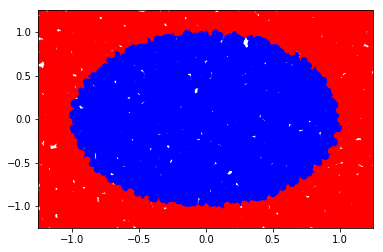

In [53]:
prediction = sess.run(y,feed_dict={x:X})
plt.scatter(x2, x1, c=['red' if i < 0.5 else 'blue' for i in prediction])
plt.ylim([-1.25,1.25])
plt.xlim([-1.25,1.25])
plt.show()

In [54]:
sess.close()